In [1]:
import tensorflow as tf
from keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import typing

2024-11-10 16:38:15.160086: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 16:38:15.162987: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-10 16:38:15.170592: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731274695.183304  255731 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731274695.186902  255731 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 16:38:15.201297: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
def count_files_in_directory(directory: str) -> None:
    for root, _, files in os.walk(directory):
        if files:
            print(f'Directory: {root} | No. Files: {len(files)}')

In [3]:
current_workdir = os.getcwd();

IMAGES_FOLDER = os.path.join(current_workdir, "input", "images")

count_files_in_directory(directory=IMAGES_FOLDER)

Directory: /home/arch/dev/other/rx-images/input/images/test/PNEUMONIA | No. Files: 855
Directory: /home/arch/dev/other/rx-images/input/images/test/NORMAL | No. Files: 317
Directory: /home/arch/dev/other/rx-images/input/images/val/PNEUMONIA | No. Files: 855
Directory: /home/arch/dev/other/rx-images/input/images/val/NORMAL | No. Files: 317
Directory: /home/arch/dev/other/rx-images/input/images/train/PNEUMONIA | No. Files: 2563
Directory: /home/arch/dev/other/rx-images/input/images/train/NORMAL | No. Files: 949


In [4]:
TRAIN_FOLDER = os.path.join(IMAGES_FOLDER, "train")
TEST_FOLDER = os.path.join(IMAGES_FOLDER, "test")
VAL_FOLDER = os.path.join(IMAGES_FOLDER, "val")

In [5]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Flatten())

cnn.add(layers.Dense(activation = 'relu', units = 128))
cnn.add(layers.Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/arch/dev/other/rx-images/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-10 16:38:17.835840: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-11-10 16:38:17.835868: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: archlinux
2024-11-10 16:38:17.835874: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: archlinux
2024-11-10 16:38:17.836034: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.

In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,393 (4.59 MB)

 Trainable params: 1,203,393 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(TRAIN_FOLDER,
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary')

validation_generator = test_datagen.flow_from_directory(VAL_FOLDER,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(TEST_FOLDER,
                                            target_size=(150, 150),
                                            batch_size=20,
                                            class_mode='binary')

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [8]:
cnn_model = cnn.fit(training_set,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50)

/home/arch/dev/other/rx-images/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 346ms/step - accuracy: 0.7885 - loss: 0.5009 - val_accuracy: 0.9390 - val_loss: 0.1556
Epoch 2/10
 76/100 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.8781 - loss: 0.2789

2024-11-10 16:39:14.920939: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/arch/.pyenv/versions/3.12.7/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.8776 - loss: 0.2825 - val_accuracy: 0.9884 - val_loss: 0.1183
Epoch 3/10


2024-11-10 16:39:15.765876: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - accuracy: 0.9089 - loss: 0.2140 - val_accuracy: 0.9480 - val_loss: 0.1511
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.8947 - loss: 0.2476 - val_accuracy: 0.9302 - val_loss: 0.1650
Epoch 5/10


2024-11-10 16:40:10.779809: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.9315 - loss: 0.1860 - val_accuracy: 0.8900 - val_loss: 0.2446
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.8860 - loss: 0.2398 - val_accuracy: 0.9767 - val_loss: 0.1021
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 305ms/step - accuracy: 0.9095 - loss: 0.2161 - val_accuracy: 0.9520 - val_loss: 0.1266
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.9351 - loss: 0.1674 - val_accuracy: 0.9477 - val_loss: 0.1619
Epoch 9/10


2024-11-10 16:41:50.975111: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


100/100 ━━━━━━━━━━━━━━━━━━━━ 29s 293ms/step - accuracy: 0.9249 - loss: 0.1836 - val_accuracy: 0.9480 - val_loss: 0.1505
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.9167 - loss: 0.2135 - val_accuracy: 0.9593 - val_loss: 0.1064


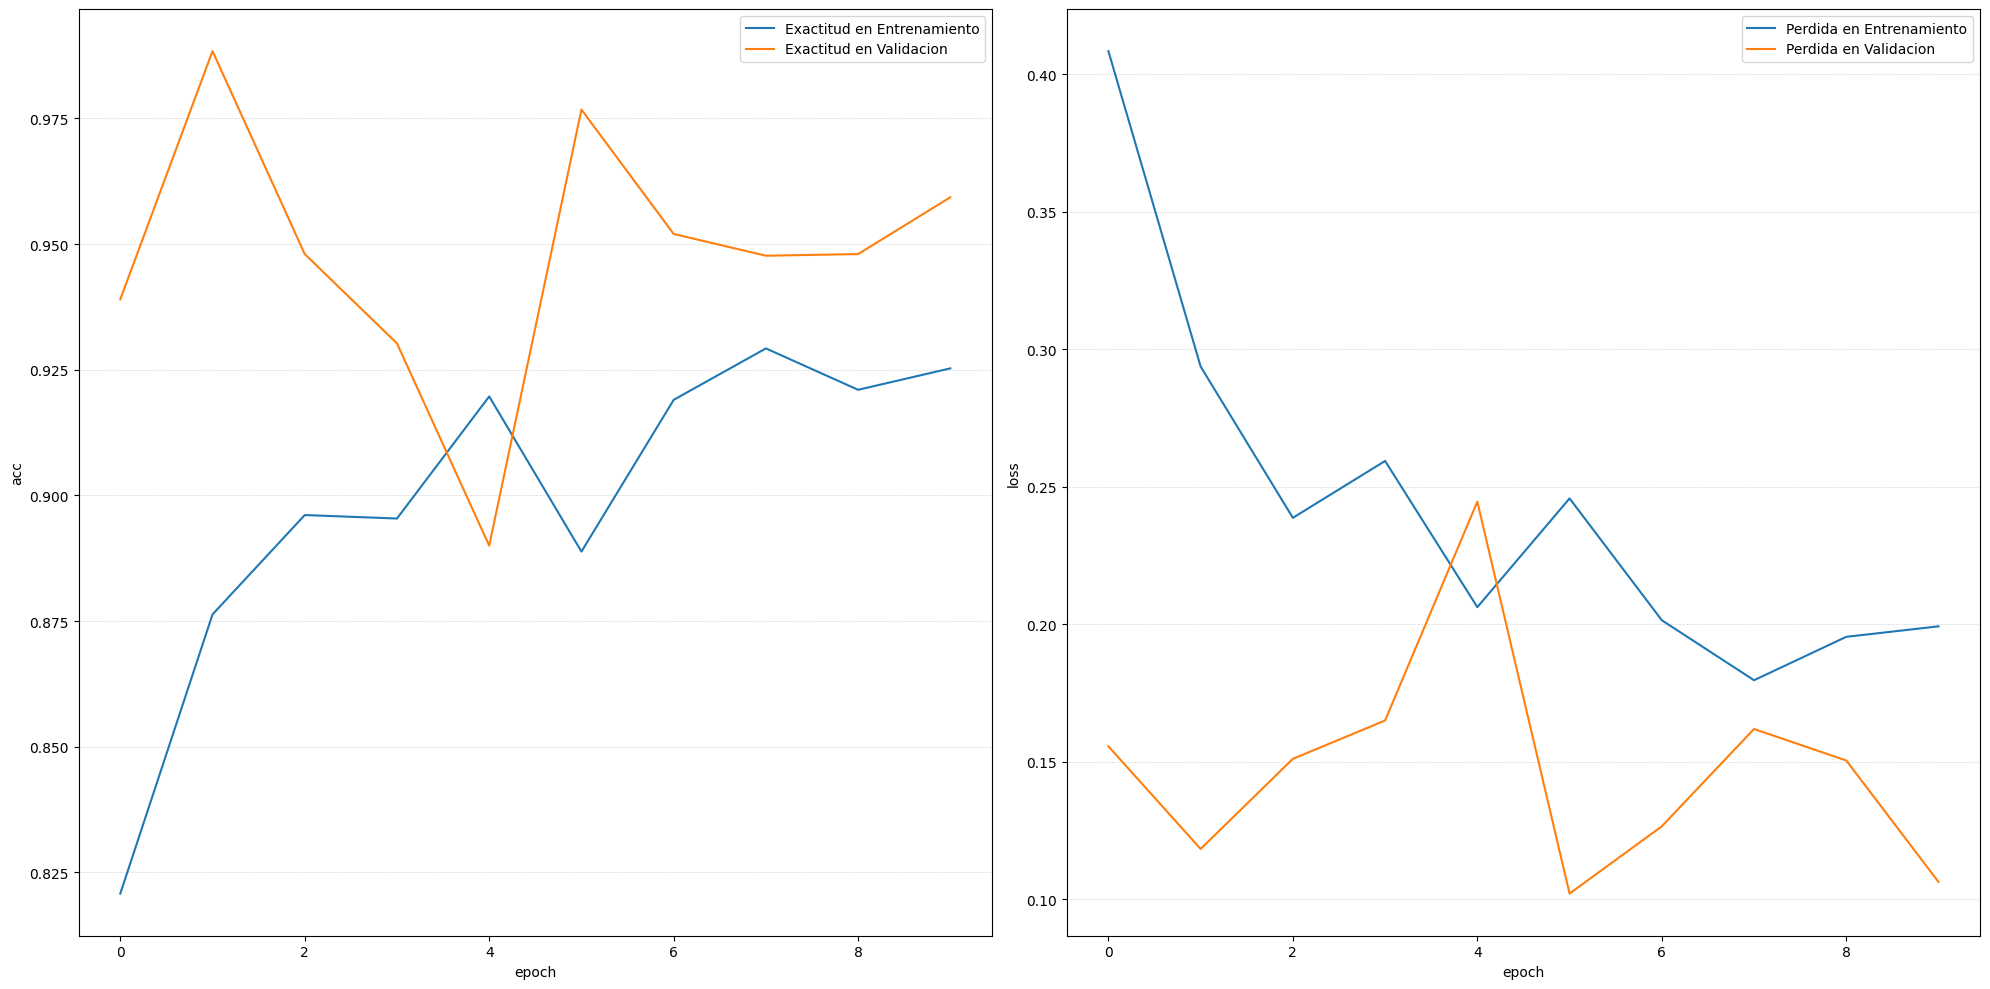

In [9]:
acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(len(acc))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.set_palette('Spectral')

sns.lineplot(
    ax=axes[0],
    data=pd.DataFrame({'epoch': epochs, 'acc': acc}),
    x='epoch',
    y='acc',
    label='Exactitud en Entrenamiento'
)

sns.lineplot(
    ax=axes[0],
    data=pd.DataFrame({'epoch': epochs, 'val_acc': val_acc}),
    x='epoch',
    y='val_acc',
    label='Exactitud en Validacion'
)

sns.lineplot(
    ax=axes[1],
    data=pd.DataFrame({'epoch': epochs, 'loss': loss}),
    x='epoch',
    y='loss',
    label='Perdida en Entrenamiento'
)

sns.lineplot(
    ax=axes[1],
    data=pd.DataFrame({'epoch': epochs, 'val_loss': val_loss}),
    x='epoch',
    y='val_loss',
    label='Perdida en Validacion'
)

for ax in axes:
    ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    
plt.tight_layout()
plt.show()

In [10]:
test_accu = cnn.evaluate(test_set,steps=50)

/home/arch/dev/other/rx-images/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8823 - loss: 0.3567


In [13]:
print(f'Accuracy: {test_accu[1] * 100}%')

Accuracy: 88.40000033378601%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Persona sin neumonia


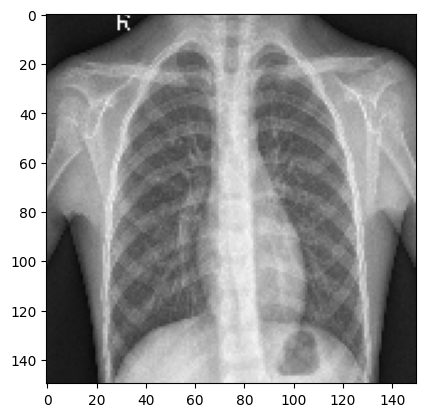

In [15]:
img_ori = cv2.imread(os.path.join(TEST_FOLDER, "NORMAL", "IM-0001-0001.jpeg"))

img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_ori, (150, 150), interpolation=cv2.INTER_CUBIC)
img_to_test = np.reshape(img, (1, 150, 150, 3))
predictions = cnn.predict(img_to_test)

if (predictions == 0):
    print('Persona sin neumonia')
else:
    print('Persona con neumonia')

plt.imshow(img)
plt.show()